# Illustration of exercise 3 in "Introduction to finite differences"

This notebook corresponds to exercise 3 of the exercise sheet "Introduction to finite differences". It illustrates the error due to the numerical scheme.

We consider here the differential equation
$$
\left\{
\begin{array}{ll}
u''(x) + \mu^2 \, u(x) = 0 &\hbox{for }x\in (a,b)\\
u(a)=A, u(b)=B
\end{array}
\right.
$$

Its exact solution is $u(x) = \alpha\, \sin\mu x + \beta \, \cos\mu x $ , $\alpha$ and $\beta$ being obtained thanks to the boundary conditions.

## Numerical approximation

Let consider a regular 1-D grid, with a constant mesh size $h$: $x_i=a+ih$ ($i=0,\ldots,N+1$) with $h=\frac{b-a}{N+1}$.
We consider the two-sided second-order finite difference approximation:
$$
\frac{u(x-h)-2u(x)+u(x+h)}{h^2} + \mu^2\, u(x) = 0
$$

This leads to the system
\begin{equation}
\left\{
\begin{array}{l}
u_{i-1}-2u_i+u_{i+1} + h^2\mu^2 u_i = 0   \qquad  i=1,\ldots, N \\
 u_0 = A, u_{N+1} = B
 \end{array}
 \right.
\end{equation}
where $u_i$ is the approximation of $u(x_i)$.

This can be written in matrix form: 
$$
 \left(\begin{array}{ccccc}
-2+ h^2\mu^2 & 1 & & & 0\\
1 & -2+ h^2\mu^2 & 1 & & \\
 & \ddots & \ddots & \ddots & \\
 & & 1 & -2+ h^2\mu^2 & 1\\
0 & & & 1 & -2+ h^2\mu^2
\end{array}\right) 
\left(\begin{array}{c}
u_1\\
\vdots\\
 \\
\vdots\\
u_N
 \end{array}\right)
\,
= \left(\begin{array}{c}
-A\\
0\\
\vdots\\
0\\
-B
\end{array}\right)
$$

In [17]:
from math import *
import matplotlib.pyplot as plt
import numpy as np

In [18]:
# definition of the problem and of the exact solution
a = 0
b = 1
mu = 20

def exactsol(xx,mu):
    coefsin, coefcos = 2, 3  # exact solution : coefsin * sin(mu * x) + coefcos * cos(mu * y)
    res = coefsin * sin(mu*xx) + coefcos * cos(mu*xx)
    return res

AA = exactsol(a,mu) # Dirichlet boundary value - left
BB = exactsol(b,mu) # Dirichlet boundary value - right

# definition of the grid
N = 50 # number of grid points within the domain (i.e. without a and b)
h=(b-a)/(N+1)
x = [k*h for k in range(N+2)]  # x goes from a to b, with a regular step (b-a)/(N+1)
# computation of the exact solution on the grid
exact = [exactsol(x[k],mu) for k in range(N+2)] 

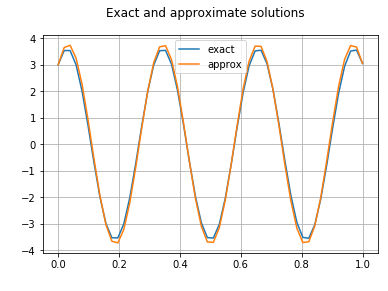

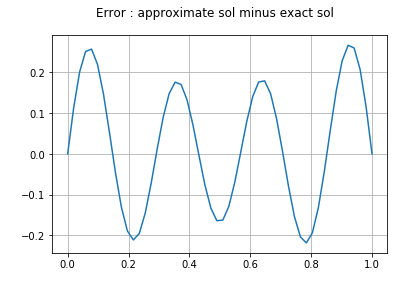

In [19]:

# creation of the system matrix
aux = -2+(mu*mu*h*h)
v1 = [aux for k in range(N)]
v2 = np.ones(N-1)
M = np.diag(v1) + np.diag(v2,1) + np.diag(v2,-1)

# creation of the right hand side
rhs = np.zeros(N)
rhs[0] = -AA
rhs[N-1] = -BB

# resolution
approx = np.linalg.solve(M, rhs)
approx = np.append(AA,approx)
approx = np.append(approx,BB)

# plot of the approximate and of the exact solutions
fig, ax = plt.subplots()
ax.plot(x, exact, label='exact')
ax.plot(x, approx, label='approx')
ax.set(xlabel=' ', ylabel=' ')
ax.grid()
ax.legend()
fig.suptitle('Exact and approximate solutions')
#fig.savefig("test.png")
plt.show()

# plot of the difference
fig, ax = plt.subplots()
ax.plot(x, approx-exact)
ax.set(xlabel=' ', ylabel=' ')
ax.grid()
fig.suptitle('Error : approximate sol minus exact sol')
#fig.savefig("test.png")
plt.show()



In [20]:
# Fourier transforms
#yfexact = np.fft.fft(exact)
#yfapprox = np.fft.fft(approx)
#
#xf = np.linspace(0.0, 1.0/(2.0*h), (N+2)/2)
#
#fig, ax = plt.subplots()
#ax.plot(xf, 2.0/(N+2) * np.abs(yfexact[:(N+2)//2]), label='exact')
#ax.plot(xf, 2.0/(N+2) * np.abs(yfapprox[:(N+2)//2]), label='approx')
#ax.legend()
#
#fig, ax = plt.subplots()
#ax.plot(xf, 2.0/(N+2) * (np.abs(yfapprox[:(N+2)//2])-np.abs(yfexact[:(N+2)//2]) ), label='difference')
#ax.legend()



## Modification of the scheme

Let modify the finite difference approximation, which becomes:
$$
\frac{u(x-h)-2u(x)+u(x+h)}{h^2} + \mu^2\, \frac{u(x-h)+u(x+h)}{2} = 0
$$

This leads to the system
\begin{equation}
\left\{
\begin{array}{l}
u_{i-1}-2u_i+u_{i+1} + \frac{h^2\mu^2}{2} (u_{i-1}+u_{i+1}) = 0   \qquad  i=1,\ldots, N \\
 u_0 = A, u_{N+1} = B
 \end{array}
 \right.
\end{equation}

Its matrix form reads: 
$$
 \left(\begin{array}{ccccc}
-2 & 1+\lambda & & & 0\\
1+\lambda & -2 & 1+\lambda & & \\
 & \ddots & \ddots & \ddots & \\
 & & 1+\lambda & -2 & 1+\lambda\\
0 & & & 1+\lambda & -2
\end{array}\right) 
\left(\begin{array}{c}
u_1\\
\vdots\\
 \\
\vdots\\
u_N
 \end{array}\right)
\,
= \left(\begin{array}{c}
-(1+\lambda)A\\
0\\
\vdots\\
0\\
-(1+\lambda)B
\end{array}\right)
$$
where $\lambda = \frac{h^2\mu^2}{2}$

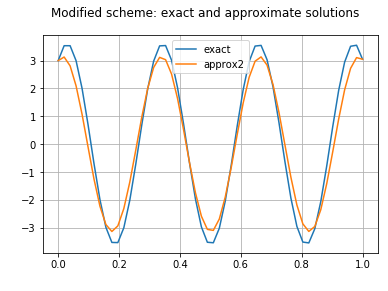

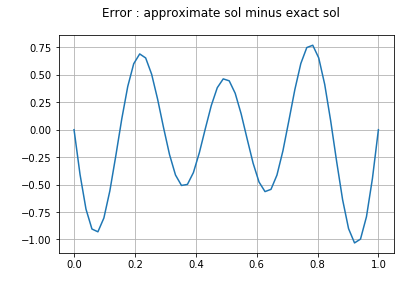

In [21]:
# creation of the system matrix
aux = 1+0.5*(mu*mu*h*h)
v1 = [-2 for k in range(N)]
v2 = [aux for k in range(N-1)]
M2 = np.diag(v1) + np.diag(v2,1) + np.diag(v2,-1)

# creation of the right hand side
rhs2 = np.zeros(N)
rhs2[0] = -aux*AA
rhs2[N-1] = -aux*BB

# resolution
approx2 = np.linalg.solve(M2, rhs2)
approx2 = np.append(AA,approx2)
approx2 = np.append(approx2,BB)

# plot of the approximate and of the exact solutions
fig, ax = plt.subplots()
ax.plot(x, exact, label='exact')
ax.plot(x, approx2, label='approx2')
ax.set(xlabel=' ', ylabel=' ')
ax.grid()
ax.legend()
fig.suptitle('Modified scheme: exact and approximate solutions')
#fig.savefig("test.png")
plt.show()

# plot of the difference
fig, ax = plt.subplots()
ax.plot(x, approx2-exact)
ax.set(xlabel=' ', ylabel=' ')
ax.grid()
fig.suptitle('Error : approximate sol minus exact sol')
#fig.savefig("test.png")
plt.show()




In [22]:
# Fourier transforms
#yfexact = np.fft.fft(exact)
#yfapprox2 = np.fft.fft(approx2)
#
#xf = np.linspace(0.0, 1.0/(2.0*h), (N+2)/2)
#
#fig, ax = plt.subplots()
#ax.plot(xf, 2.0/(N+2) * np.abs(yfexact[:(N+2)//2]), label='exact')
#ax.plot(xf, 2.0/(N+2) * np.abs(yfapprox2[:(N+2)//2]), label='approx')
#ax.legend()
#
#fig, ax = plt.subplots()
#ax.plot(xf, 2.0/(N+2) * (np.abs(yfapprox2[:(N+2)//2])-np.abs(yfexact[:(N+2)//2]) ), label='difference')
#ax.legend()
